# Task 8: Clustering with K-Means
**Objective**: Perform unsupervised learning using the K-Means algorithm to identify meaningful customer segments.

## Step 1: Import Required Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## Step 2: Load the Dataset

In [12]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Step 3: Basic Exploratory Data Analysis (EDA)

In [15]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Step 4: Selecting Relevant Features

In [18]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

## Step 5: Feature Scaling

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 6: Finding Optimal Clusters (Elbow Method)

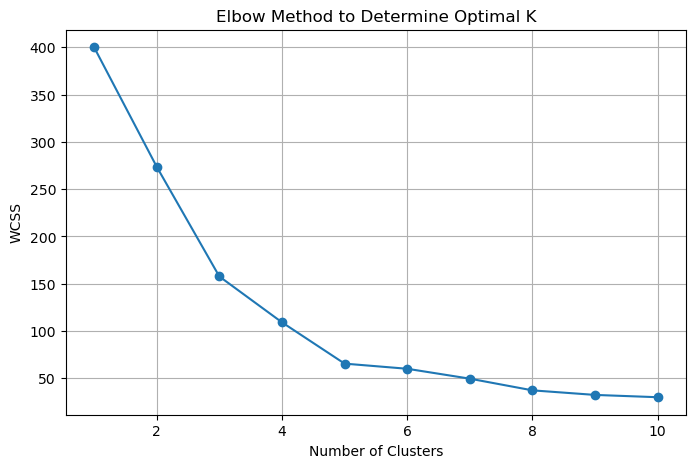

In [40]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

## Step 7: Apply K-Means Clustering with K=5

In [44]:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_counts = collections.Counter(y_kmeans)
print("Cluster distribution:", cluster_counts)
y_kmeans = kmeans.fit_predict(X_scaled)

Cluster distribution: Counter({0: 81, 1: 39, 3: 35, 4: 23, 2: 22})


## Step 8: Visualizing Clusters

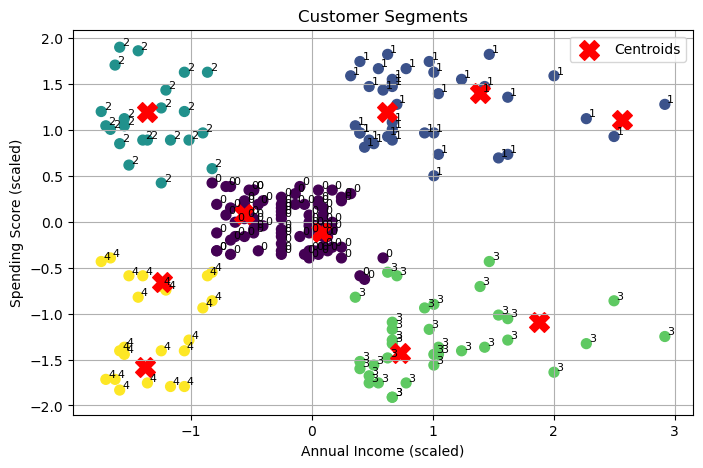

In [42]:
plt.figure(figsize=(8,5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')

for i, label in enumerate(y_kmeans):
    plt.text(X_scaled[i, 0] + 0.02, X_scaled[i, 1] + 0.02, str(label), fontsize=8)

plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()

## Step 9: Silhouette Score Evaluation

In [33]:
score = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.555


## Conclusion

- We applied K-Means clustering to segment mall customers based on annual income and spending score.
- The optimal number of clusters was found to be 5 using the Elbow method.
- Visualization helped us clearly see the customer segments.
- Silhouette Score: ~0.55, indicating a fair clustering structure.
- This kind of segmentation can help mall management and marketing teams design **targeted promotions and personalized strategies** for different customer groups.